In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import random

結晶中の同じ原子の数: 3, 回転軸ベクトル: (0, 0, 1), 回転角（°）: 120


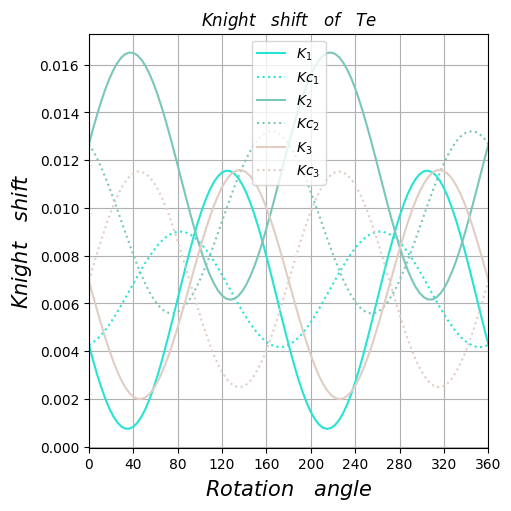

In [4]:
# 整数の入力を促すメッセージを表示し、ユーザーからの入力を受け取る
l = int(input("結晶中に、同じ原子は何個ありますか？: "))
kx = int(input("原子の回転軸ベクトルのx座標: "))
ky = int(input("原子の回転軸ベクトルのy座標: "))
kz = int(input("原子の回転軸ベクトルのz座標: "))
t = int(input("回転角度は？（度数法で入力して！）: "))

# 入力された値を使って何かしらの処理をする
print(f"結晶中の同じ原子の数: {l}, 回転軸ベクトル: {kx, ky, kz}, 回転角（°）: {t}")

# プロットの設定
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$Knight \quad shift \quad of \quad Te$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15)
axes.set_ylabel(r"$Knight \quad shift$", fontsize=15)

axes.set_xlim([0, 360])
axes.set_xticks(np.linspace(0, 360, 10))
axes.grid()

x = np.linspace(0, 360, 100)

# 単位ベクトルの生成
k = np.array(random.sample(range(1, 100), 3))  # 例としてランダムな単位ベクトルを使用
kn = np.linalg.norm(k)  # 生成したベクトルの大きさ
n = k / kn

# 単位ベクトルに垂直な単位ベクトルの生成
def generate_perpendicular_unit_vector(n):
    """
    入力された単位ベクトル n に垂直な単位ベクトルを生成する
    """
    if np.all(n == 0):
        raise ValueError("The input vector n should not be the zero vector.")
    
    # 任意のベクトル w を選択
    if abs(n[0]) < abs(n[1]) and abs(n[0]) < abs(n[2]):
        w = np.array([1, 0, 0])
    elif abs(n[1]) < abs(n[0]) and abs(n[1]) < abs(n[2]):
        w = np.array([0, 1, 0])
    else:
        w = np.array([0, 0, 1])
    
    # n と w の外積を計算して、n に垂直なベクトルを求める
    perp_vec = np.cross(n, w)
    
    # 垂直なベクトルを正規化して単位ベクトルにする
    perp_unit_vec = perp_vec / np.linalg.norm(perp_vec)
    
    return perp_unit_vec

# sに書き換えてる
s = generate_perpendicular_unit_vector(n)

# n×sの計算
c = np.cross(n, s)

# thetaの書き換え
theta = np.radians(x)

# ロドリゲスの回転公式×磁場ベクトル
def rodrigues_rotation(n, s, theta):
    h = (s[:, np.newaxis] * np.cos(theta) +
         np.cross(n, s)[:, np.newaxis] * np.sin(theta) +
         n[:, np.newaxis] * np.dot(n, s) * (1 - np.cos(theta)))
    return h

# h（磁場ベクトル）に書き換えてる
h = rodrigues_rotation(n, s, theta)

# ロドリゲスの回転公式×磁場ベクトル（垂直版）
def rodrigues_rotation2(c, s, theta):
    hc = (s[:, np.newaxis] * np.cos(theta) +
         np.cross(c, s)[:, np.newaxis] * np.sin(theta) +
         c[:, np.newaxis] * np.dot(c, s) * (1 - np.cos(theta)))
    return hc

# hc（磁場ベクトル：垂直版）に書き換えてる
hc = rodrigues_rotation2(c, s, theta)

# 原子を回転させるための行列
def rotation_matrix():
    identity_matrix = np.identity(3)
    matrices = []
    for i in range(l):
        R = np.array([[0, -kz, ky], [kz, 0, -kx], [-ky, kx, 0]])
        theta = np.radians(t * i)
        rot_mat = identity_matrix + np.sin(theta) * R + (1 - np.cos(theta)) * np.dot(R, R)
        matrices.append(rot_mat)
    return matrices

# Rに書き換えてる
R = rotation_matrix()

# 各iに対応する色を設定
colors = np.random.rand(l, l)

# それぞれのiでのナイトシフトの磁場角度依存性を計算して表示
for i in range(l):
    XX, XY, YY, YZ, ZZ, XZ = [random.uniform(1e-4, 1e-2) for _ in range(6)]
    K = np.array([[XX, XY, XZ], [XY, YY, YZ], [XZ, YZ, ZZ]])
    
    # hの各ベクトルを使ってKを計算
    K_rot_values = []
    for j in range(len(h[0])):
        h_vec = np.array([h[0][j], h[1][j], h[2][j]])
        K_rot = np.dot(h_vec.T, np.dot(R[i], np.dot(K, np.dot(np.linalg.inv(R[i]), h_vec))))
        K_rot_values.append(K_rot)
    
    # hcの各ベクトルを使ってKを計算
    Kc_rot_values = []
    for j in range(len(hc[0])):
        hc_vec = np.array([hc[0][j], hc[1][j], hc[2][j]])
        Kc_rot = np.dot(hc_vec.T, np.dot(R[i], np.dot(K, np.dot(np.linalg.inv(R[i]), hc_vec))))
        Kc_rot_values.append(Kc_rot)

    # 各角度に対するK_rotの値を取得し、プロット
    axes.plot(x, K_rot_values, color=colors[i], label=f'$K_{i+1}$')
    axes.plot(x, Kc_rot_values, ":", color=colors[i], label=f'$Kc_{i+1}$')

axes.legend()

# 自動スケール調整
plt.autoscale(enable=True, axis='y')

plt.show()